# Python Plots

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Bar chart

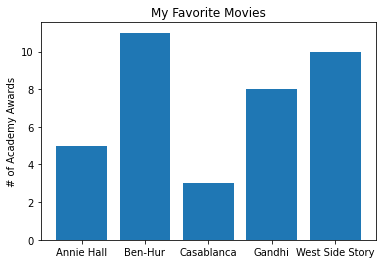

In [2]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

plt.bar(xs, num_oscars) # plot bars with left x-coordinates [xs], heights [num_oscars]
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.xticks(xs, movies) # label x-axis with movie names at bar centers
plt.show()

### Histogram

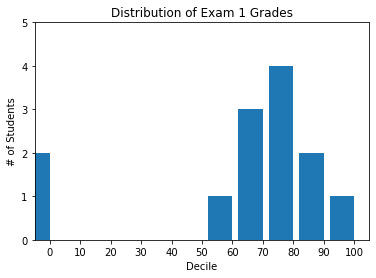

In [3]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(), # give each bar its correct height
        8) # give each bar a width of 8
plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105, y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

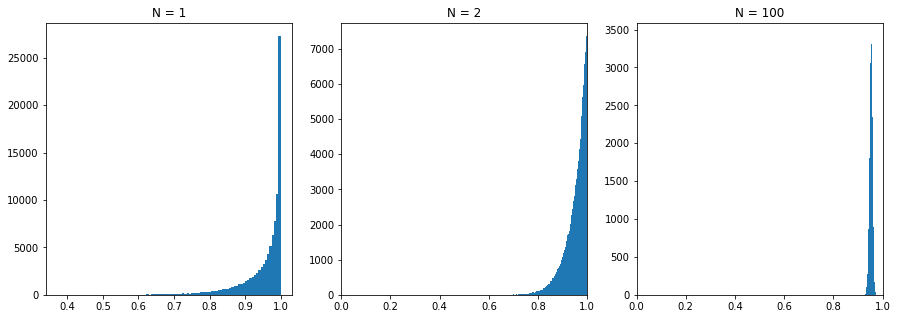

In [14]:
N = 100
x = np.random.beta(10, 0.5,(N, int(1E5))) #change N to 100
plt.figure(figsize=(15,5))

Na = 1
plt.subplot(131)
plt.hist(x[:Na, :].mean(0), 100) #let the bin size be 100
#plt.axis([0, 1, 0, None])
plt.title('N = {}'.format(Na))

plt.subplot(132)
Nb = 2
plt.hist(x[:Nb, :].mean(0), 100)
plt.axis([0, 1, 0, None])
plt.title('N = {}'.format(Nb))

plt.subplot(133)
Nc = N
plt.hist(x[:Nc, :].mean(0), 100)
plt.axis([0, 1, 0, None])
plt.title('N = {}'.format(Nc))

plt.show()

https://matplotlib.org/gallery/statistics/histogram_features.html

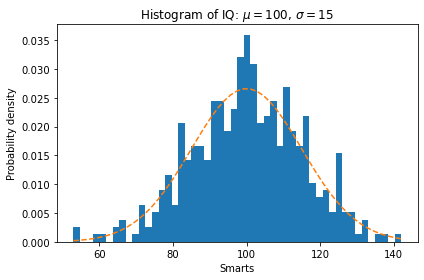

In [4]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)
num_bins = 50


fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True) # the histogram of the data

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) # add a 'best fit' line, Normal Distribution
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

fig.tight_layout() # Tweak spacing to prevent clipping of ylabel
plt.show()

Remember to start y axis at 0

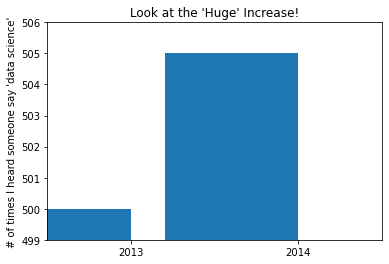

In [5]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'") 
plt.ticklabel_format(useOffset=False) # if you don't do this, matplotlib will label the x-axis 0, 1 and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

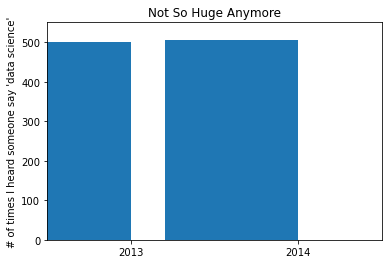

In [6]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'") # if you don't do this, matplotlib will label the x-axis 0, 1 and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False) # misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore")
plt.show()

More Advanced: https://matplotlib.org/gallery/statistics/barchart_demo.html

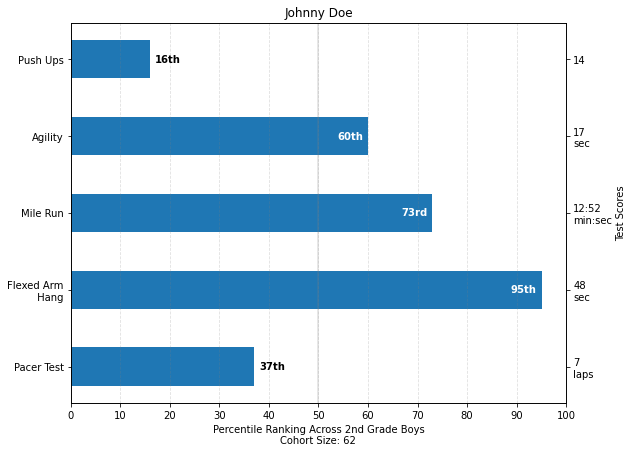

In [7]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)
Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_units = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))



# Funcion que convierte un entero en un numero ordinal
def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]

# Formato de las medidas en el eje y (numero y debajo la unidad)
def format_score(score, test):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:  # If no unit, don't include a newline, so that label stays centered.
        return score

# Elige las unidades correctas del diccionario dependiendo de la y
def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]

# Crea el plot
def plot_student_results(student, scores, cohort_size):
    
    fig, ax1 = plt.subplots(figsize=(9, 7))  # Create the figure
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names)) # Numero de barras horizontales
    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names) # Plot de barras horizontales

    ax1.set_title(student.name)
    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25) # Grid gris discontinuo    
    ax1.axvline(50, color='grey', alpha=0.25) # Plot a solid vertical gridline to highlight the median position

    ax2 = ax1.twinx() # Set the right-hand Y-axis ticks and labels (Segundo eje Y)
    ax2.set_yticks(pos) # Set the tick locations
    ax2.set_ylim(ax1.get_ylim()) # Set equal limits on both yaxis so that the ticks line up
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names]) # Set the tick labels
    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rank_str = attach_ordinal(width)
        if width < 40: # The bars aren't wide enough to print the ranking inside
            xloc = 5 # Shift the text to the right side of the right edge
            clr = 'black' # Black against white background
            align = 'left'
        else:
            xloc = -5 # Shift the text to the left side of the right edge
            clr = 'white' # White on magenta
            align = 'right'

        
        yloc = rect.get_y() + rect.get_height() / 2 # Center the text vertically in the bar
        label = ax1.annotate(
            rank_str,
            xy=(width, yloc), # Point to annotate
            xytext=(xloc, 0), # Position where place the text (relative coordenates from xy)
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    ax2.fmt_ydata = format_ycursor # Make the interactive mouse over give the bar title
    # Return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}





# Para pintarlo
student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(test_names,
                  (Score(v, p) for v, p in 
                   zip(['7', '48', '12:52', '17', '14'], np.round(np.random.uniform(0, 100, len(test_names)), 0))
                  )
                 )
             )
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

## Bar with dots chart

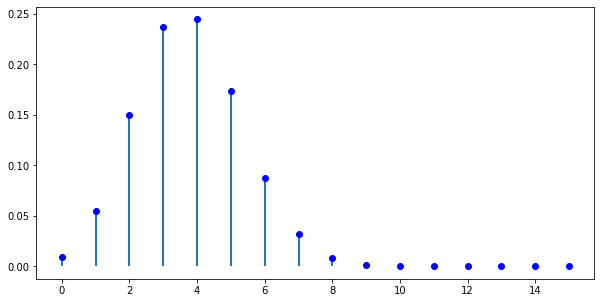

In [13]:
from scipy import stats as st

M, n, N = 100, 25, 15 #Population, Successes, No of draws
x = np.arange(0,N+1)


plt.figure(figsize=(10,5))
plt.plot(x, st.hypergeom.pmf(x, M, n, N),'bo')
plt.vlines(x,0,st.hypergeom.pmf(x, M, n, N),lw=2)
plt.show()

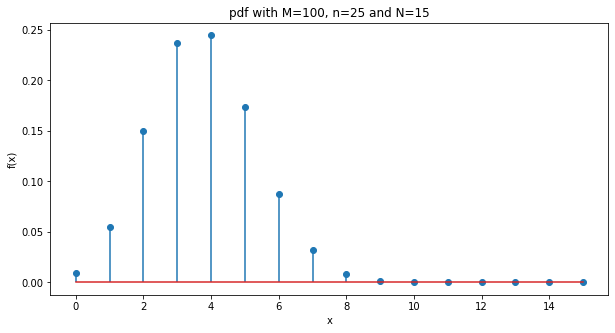

In [11]:
M, n, N = 100, 25, 15 #Population, Successes, No of draws
x = np.arange(0, N+1)


plt.figure(figsize=(10,5))
plt.stem(x, st.hypergeom.pmf(x, M, n, N))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('pdf with M={}, n={} and N={}'.format(M, n, N))
plt.show()

## Boxplot

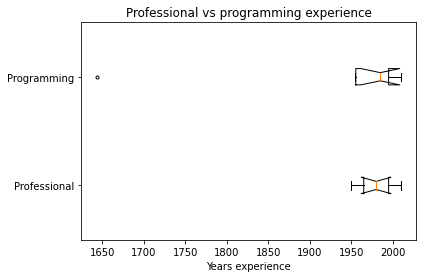

In [4]:
professional_experience = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
programming_experience = [1956, 1985, 1955, 1643, 1990, 2000, 2010]
plt.boxplot([professional_experience, programming_experience], 
            vert=False, notch=True, flierprops={'marker':'.'})
plt.yticks([1,2], ['Professional', 'Programming'])
plt.xlabel('Years experience')
plt.title('Professional vs programming experience')
plt.show()

## Line chart

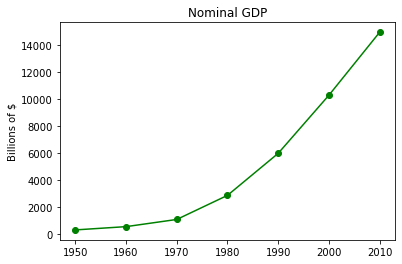

In [8]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='solid') # create a line chart, years on x-axis, gdp on y-axis
plt.title("Nominal GDP") # add a title
plt.ylabel("Billions of $") # add a label to the y-axis
plt.show()

Posicion de la leyenda: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

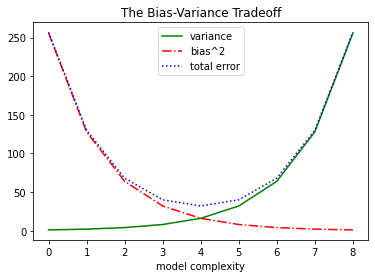

In [9]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]


# we can make multiple calls to plt.plot to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
plt.legend(loc=9) # because we've assigned labels to each series we can get a legend for free loc=9 means "top center"
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

Example from Matplotlib page: https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html

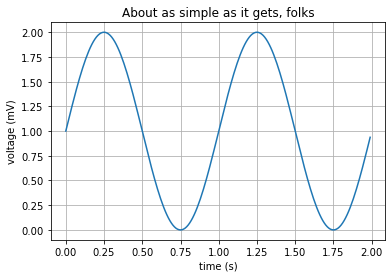

In [10]:
import numpy as np

t = np.arange(0.0, 2.0, 0.01) # Data for plotting
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()
plt.show()

## Scatterplots

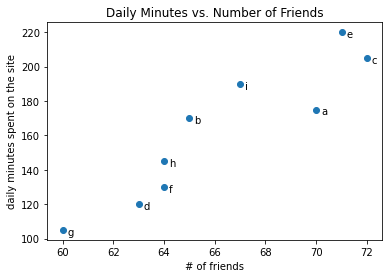

In [11]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes): # label each point
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

Sometimes we should equal the scale of axis

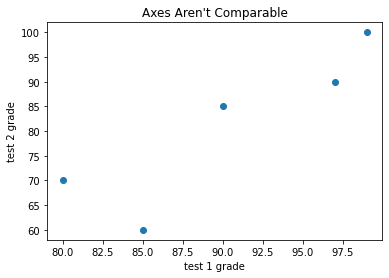

In [12]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

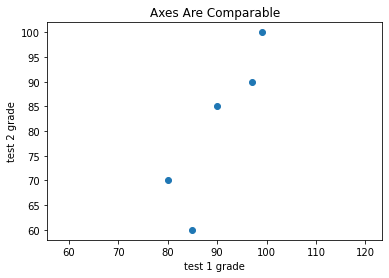

In [13]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.axis("equal") # Equal axis
plt.title("Axes Are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

More advanced: https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html

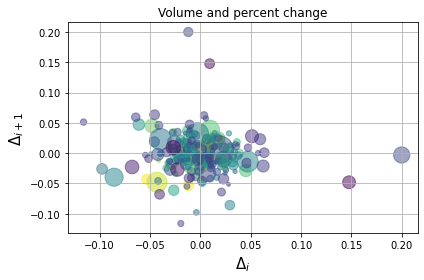

In [14]:
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
price_data = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
              .view(np.recarray))
price_data = price_data[-250:]  # get the most recent 250 trading days
delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:],
           c=close, # color
           s=volume, # size
           alpha=0.5)
ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')
ax.grid(True)
fig.tight_layout()

plt.show()

## Subplots

https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html

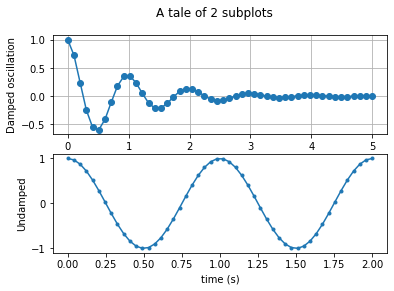

In [15]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)


fig, (ax1, ax2) = plt.subplots(2, 1) # 2 filas y 1 columna
fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')
ax1.grid()

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

https://matplotlib.org/tutorials/introductory/sample_plots.html

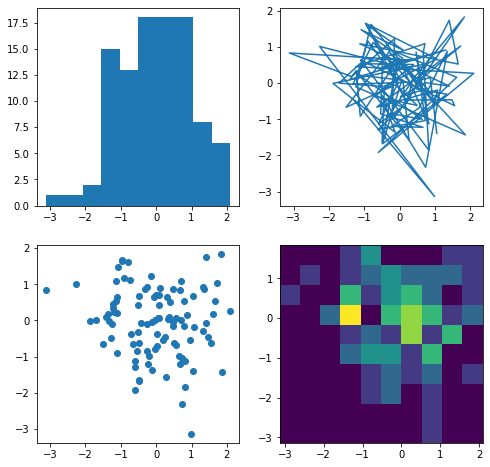

In [16]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

## Images

https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html

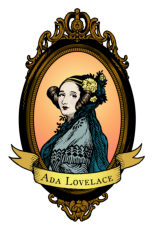

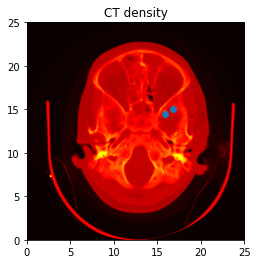

In [17]:
import matplotlib.cbook as cbook

with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file) # A sample image


fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis


# And another image
w, h = 512, 512
with cbook.get_sample_data('ct.raw.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o') # Plot de los dos puntos azules

ax.set_title('CT density')
plt.show()

## Colormesh

https://matplotlib.org/gallery/images_contours_and_fields/pcolormesh_levels.html

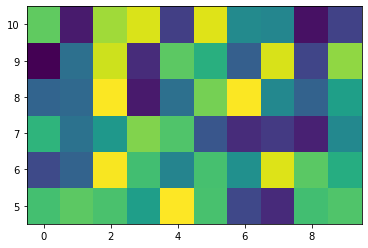

In [18]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)
plt.show()

Non-rectilinear

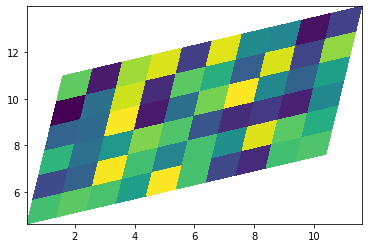

In [19]:
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
X, Y = np.meshgrid(x, y)
X = X + 0.2 * Y  # tilt the coordinates.
Y = Y + 0.3 * X

fig, ax = plt.subplots()
ax.pcolormesh(X, Y, Z)
plt.show()

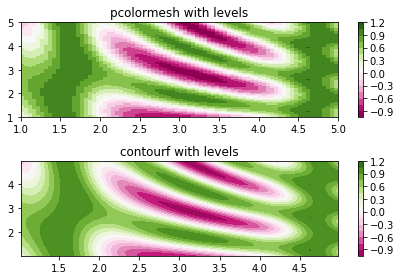

In [20]:
from matplotlib.colors import BoundaryNorm
dx, dy = 0.05, 0.05 # make these smaller to increase the resolution
# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap) # contours are *point* based plots, so convert our bound into point centers
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

fig.tight_layout() # adjust spacing between subplots so `ax1` title and `ax0` tick labels don't overlap
plt.show()

### 2D Histogram

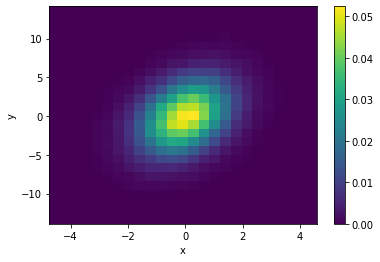

In [19]:
mean = (0, 0)
cov = [[1, 1], [1, 10]]
x, y = np.random.multivariate_normal(mean, cov, 100000).T

#plt.scatter(x, y)
plt.hist2d(x, y, 25, density=True) #hexbin
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.axis('equal')
plt.show()

## Path

https://matplotlib.org/gallery/shapes_and_collections/path_patch.html

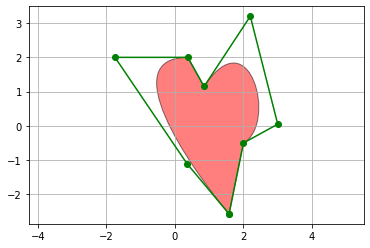

In [21]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

## 3D Surface

https://matplotlib.org/gallery/mplot3d/surface3d.html

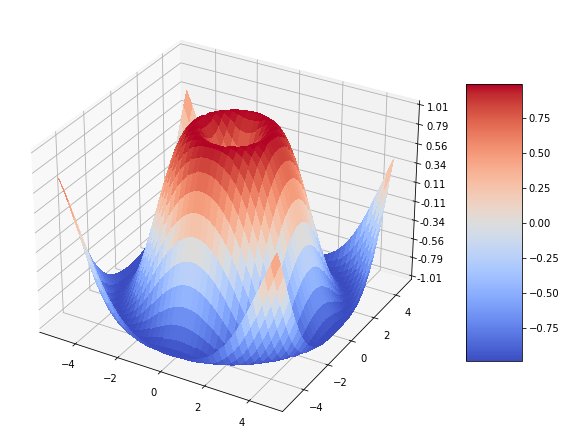

In [22]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01) # Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}') # A StrMethodFormatter is used automatically (dos decimales para el eje z)
fig.colorbar(surf, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.
fig.tight_layout()
plt.show()

## Streamplot

https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.html

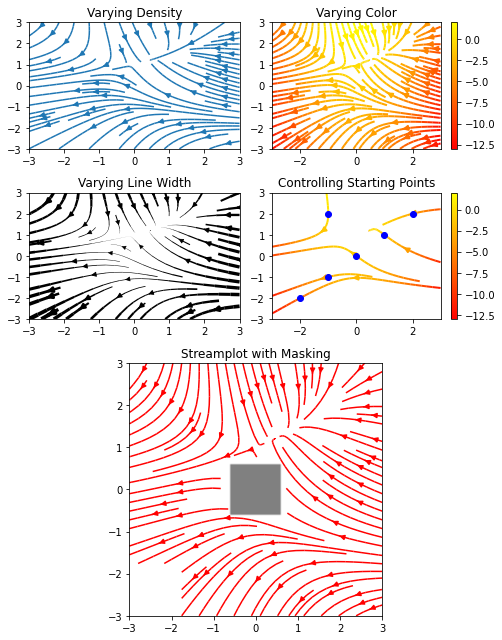

In [23]:
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)


fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

# Plot 1: Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Plot 2: Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

# Plot 3: Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Plot 4: Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])
ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')
ax3.plot(seed_points[0], seed_points[1], 'bo') # Displaying the starting points with blue symbols.
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Plot 5: Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')
ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

## Ellipses

https://matplotlib.org/gallery/shapes_and_collections/ellipse_demo.html

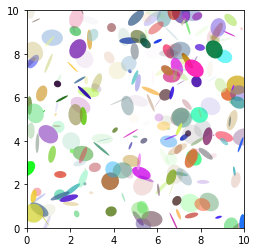

In [24]:
from matplotlib.patches import Ellipse


# Fixing random state for reproducibility
np.random.seed(19680801)

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

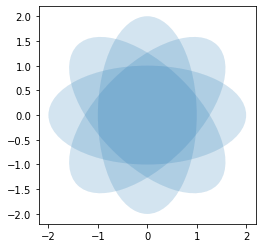

In [25]:
from matplotlib.patches import Ellipse

angle_step = 45  # degrees
angles = np.arange(0, 360, angle_step)

ax = plt.subplot(aspect='equal')

for angle in angles:
    ellipse = Ellipse((0, 0), 4, 2, angle=angle, alpha=0.1)
    ax.add_artist(ellipse)

plt.xlim(-2.2, 2.2)
plt.ylim(-2.2, 2.2)

plt.show()

## Pie chart

https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html

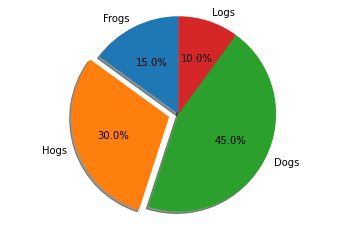

In [26]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Tables

https://matplotlib.org/gallery/misc/table_demo.html

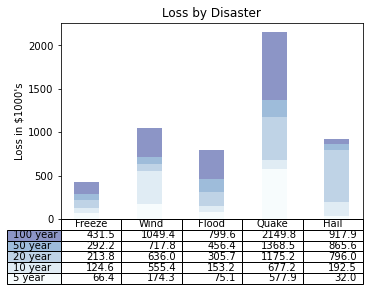

In [27]:

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

## Slider

https://matplotlib.org/gallery/widgets/slider_demo.html

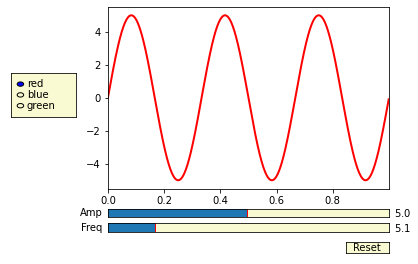

In [28]:
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

# Initialize plot with correct initial active value
colorfunc(radio.value_selected)

plt.show()

## Filled plot

https://matplotlib.org/gallery/lines_bars_and_markers/fill.html

In [29]:
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

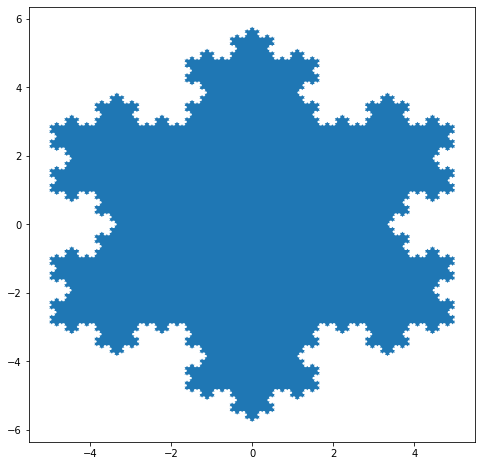

In [30]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.fill(x, y)
plt.show()

## Date Handling

https://matplotlib.org/tutorials/introductory/sample_plots.html

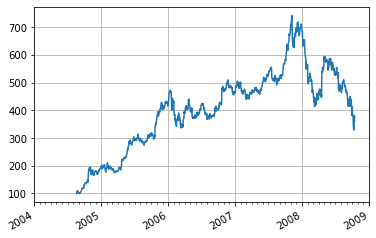

In [31]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

## Log Plots

https://matplotlib.org/gallery/scales/log_demo.html

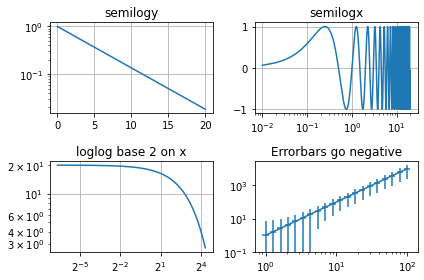

In [32]:
# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0))
ax3.set_xscale('log', base=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonpositive='clip')
ax4.set_yscale("log", nonpositive='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()

## Polar Plots

https://matplotlib.org/gallery/pie_and_polar_charts/polar_demo.html

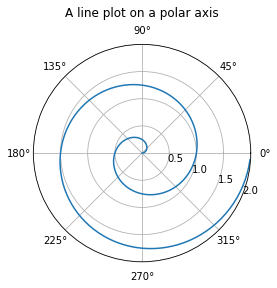

In [33]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## Legends

https://matplotlib.org/gallery/text_labels_and_annotations/legend.html

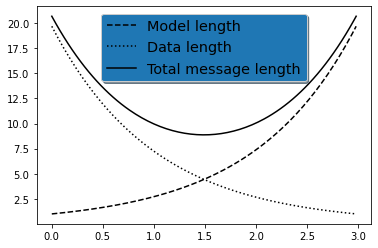

In [34]:
# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

## XKCD Plot

https://matplotlib.org/gallery/showcase/xkcd.html

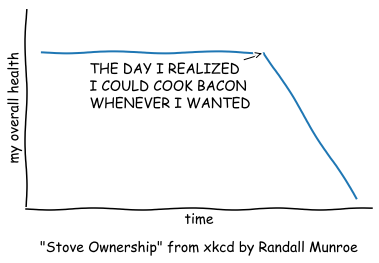

In [35]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

## Rendering TeX

https://matplotlib.org/gallery/text_labels_and_annotations/tex_demo.html

In [36]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\Federico\.matplotlib\tex.cache\1acea6f6c115d0ec7a634ed0529287b9.tex.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.

<Figure size 432x288 with 1 Axes>

In [37]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\Federico\.matplotlib\tex.cache\1acea6f6c115d0ec7a634ed0529287b9.tex.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.

<Figure size 432x288 with 1 Axes>